In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv("./dataset/dataset.csv", parse_dates=['date'])

df

,season,date,home,away,fulltime_home_goals,fulltime_away_goals,fulltime_result,halftime_home_goals,halftime_away_goals,halftime_result,...,home_fouls_committed,away_fouls_committed,home_fouls_won,away_fouls_won,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_xg,away_xg
0,2017_2018,2017-08-18,Leganes,Alaves,1,0,H,1,0,H,...,17,17,16,17,0,1,0,0,1.3,1.1
1,2017_2018,2017-08-18,Valencia,Las Palmas,1,0,H,1,0,H,...,25,13,13,24,3,2,0,1,1.4,0.2
2,2017_2018,2017-08-19,Celta Vigo,Real Sociedad,2,3,A,1,1,D,...,12,11,10,11,3,1,0,0,1.8,2.1
3,2017_2018,2017-08-19,Girona,Atletico Madrid,2,2,D,2,0,H,...,15,15,14,15,2,4,0,1,2.2,0.7
4,2017_2018,2017-08-19,Sevilla,Espanyol,1,1,D,1,1,D,...,14,12,12,14,2,4,1,0,2.4,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,2022_2023,2023-02-26,Athletic Bilbao,Girona,2,3,A,1,3,A,...,17,8,7,17,5,5,0,0,1.6,1.2
2118,2022_2023,2023-02-26,Celta Vigo,Real Valladolid,3,0,H,2,0,H,...,6,5,4,6,1,3,0,1,1.8,0.5
2119,2022_2023,2023-02-26,Almeria,Barcelona,1,0,H,1,0,H,...,13,11,11,13,3,3,0,0,1.0,1.1
2120,2022_2023,2023-02-26,Sevilla,Osasuna,2,3,A,0,1,A,...,10,15,15,9,4,2,1,0,2.2,1.0


# Dealing with missing values

The following features contain missing values:

In [3]:
isna_sum = df.isna().sum()
isna_features = isna_sum[isna_sum > 0]

isna_features

pinnaclesports_home_win_odds              3
pinnaclesports_draw_odds                  3
pinnaclesports_away_win_odds              3
pinnaclesports_closing_home_win_odds      1
pinnaclesports_closing_draw_odds          1
pinnaclesports_closing_away_win_odds      1
attendance                              487
dtype: int64

'attendance' (the total number of people attending the venue to watch the match) contains too many missing values and since it cannot be deducted from other features, the best strategy is to drop this feature.

In [4]:
df = df.drop('attendance', axis='columns')

As for the other columns including missing values, since the total number of instances are too few, those instances can safely be dropped.

In [5]:
df = df.dropna(axis='index')

# Feature type casting

In [6]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.dtypes) 

season                                          object
date                                    datetime64[ns]
home                                            object
away                                            object
fulltime_home_goals                              int64
fulltime_away_goals                              int64
fulltime_result                                 object
halftime_home_goals                              int64
halftime_away_goals                              int64
halftime_result                                 object
bet365_home_win_odds                           float64
bet365_draw_odds                               float64
bet365_away_win_odds                           float64
betandwin_home_win_odds                        float64
betandwin_draw_odds                            float64
betandwin_away_win_odds                        float64
interwetten_home_win_odds                      float64
interwetten_draw_odds                          float64
interwette

## Formatting the features with string types (object dtype)

In [7]:
df.select_dtypes(['object']).dtypes

season             object
home               object
away               object
fulltime_result    object
halftime_result    object
venue              object
dtype: object

There are 3 groups of string features:
<ul>
<li>The 'venue' feature will be dropped</li>
<li>The 'season', 'home', and 'away' features will later be used for panel data analysis.</li>
<li>The 'halftime_result' and 'fulltime_result' features will be encoded to numerical representations.</li>
</ul>

In [8]:
df['halftime_result'].value_counts()

D    950
H    678
A    490
Name: halftime_result, dtype: int64

In [9]:
df['fulltime_result'].value_counts()

H    941
A    604
D    573
Name: fulltime_result, dtype: int64

In [10]:
df[['halftime_result', 'fulltime_result']] = (
    df[['halftime_result', 'fulltime_result']].replace(
        {
            'A':0,
            'D':1,
            'H':2,
        }
    ))

Both 'halftime_result' and 'fulltime_result' features will be cast to int in the next step.

## Casting numerical features to their correct dtypes

In [11]:
df.select_dtypes(['float64']).dtypes

bet365_home_win_odds                    float64
bet365_draw_odds                        float64
bet365_away_win_odds                    float64
betandwin_home_win_odds                 float64
betandwin_draw_odds                     float64
betandwin_away_win_odds                 float64
interwetten_home_win_odds               float64
interwetten_draw_odds                   float64
interwetten_away_win_odds               float64
pinnaclesports_home_win_odds            float64
pinnaclesports_draw_odds                float64
pinnaclesports_away_win_odds            float64
williamhill_home_win_odds               float64
williamhill_draw_odds                   float64
williamhill_away_win_odds               float64
vcbet_home_win_odds                     float64
vcbet_draw_odds                         float64
vcbet_away_win_odds                     float64
pinnaclesports_closing_home_win_odds    float64
pinnaclesports_closing_draw_odds        float64
pinnaclesports_closing_away_win_odds    

The betting features as well as the expected goal metrics are by nature decimal numbers; other than those, the rest of the numerical features should be cast to integer type.

In [12]:
columns_to_cast = [
   'halftime_result',
   'fulltime_result',
   'home_rating_delta',
   'home_post_rating',
   'away_rating_delta',
   'away_post_rating',
   'home_possession',
   'away_possession',
   'home_passing_percent',
   'away_passing_percent',
   'home_tackles_percent',
   'away_tackles_percent',
   'home_aerial_duels',
   'away_aerial_duels', 
]

for col in columns_to_cast:
    df[col] = df[col].astype('int')


# Initial feature selection

In this step, the primary features will be reviewed and the redundant ones will be dropped.

## Betting odds

The betting odds are gathered from several sources, some of which might correlate very closely; hence, they are analyzed and a candidate subset is selected.

In [13]:
betting_cols = [col 
                for term in ['home_win_odds', 'draw_odds', 'away_win_odds'] 
                for col in df.columns if term in col]

betting_cols

['bet365_home_win_odds',
 'betandwin_home_win_odds',
 'interwetten_home_win_odds',
 'pinnaclesports_home_win_odds',
 'williamhill_home_win_odds',
 'vcbet_home_win_odds',
 'pinnaclesports_closing_home_win_odds',
 'bet365_draw_odds',
 'betandwin_draw_odds',
 'interwetten_draw_odds',
 'pinnaclesports_draw_odds',
 'williamhill_draw_odds',
 'vcbet_draw_odds',
 'pinnaclesports_closing_draw_odds',
 'bet365_away_win_odds',
 'betandwin_away_win_odds',
 'interwetten_away_win_odds',
 'pinnaclesports_away_win_odds',
 'williamhill_away_win_odds',
 'vcbet_away_win_odds',
 'pinnaclesports_closing_away_win_odds']

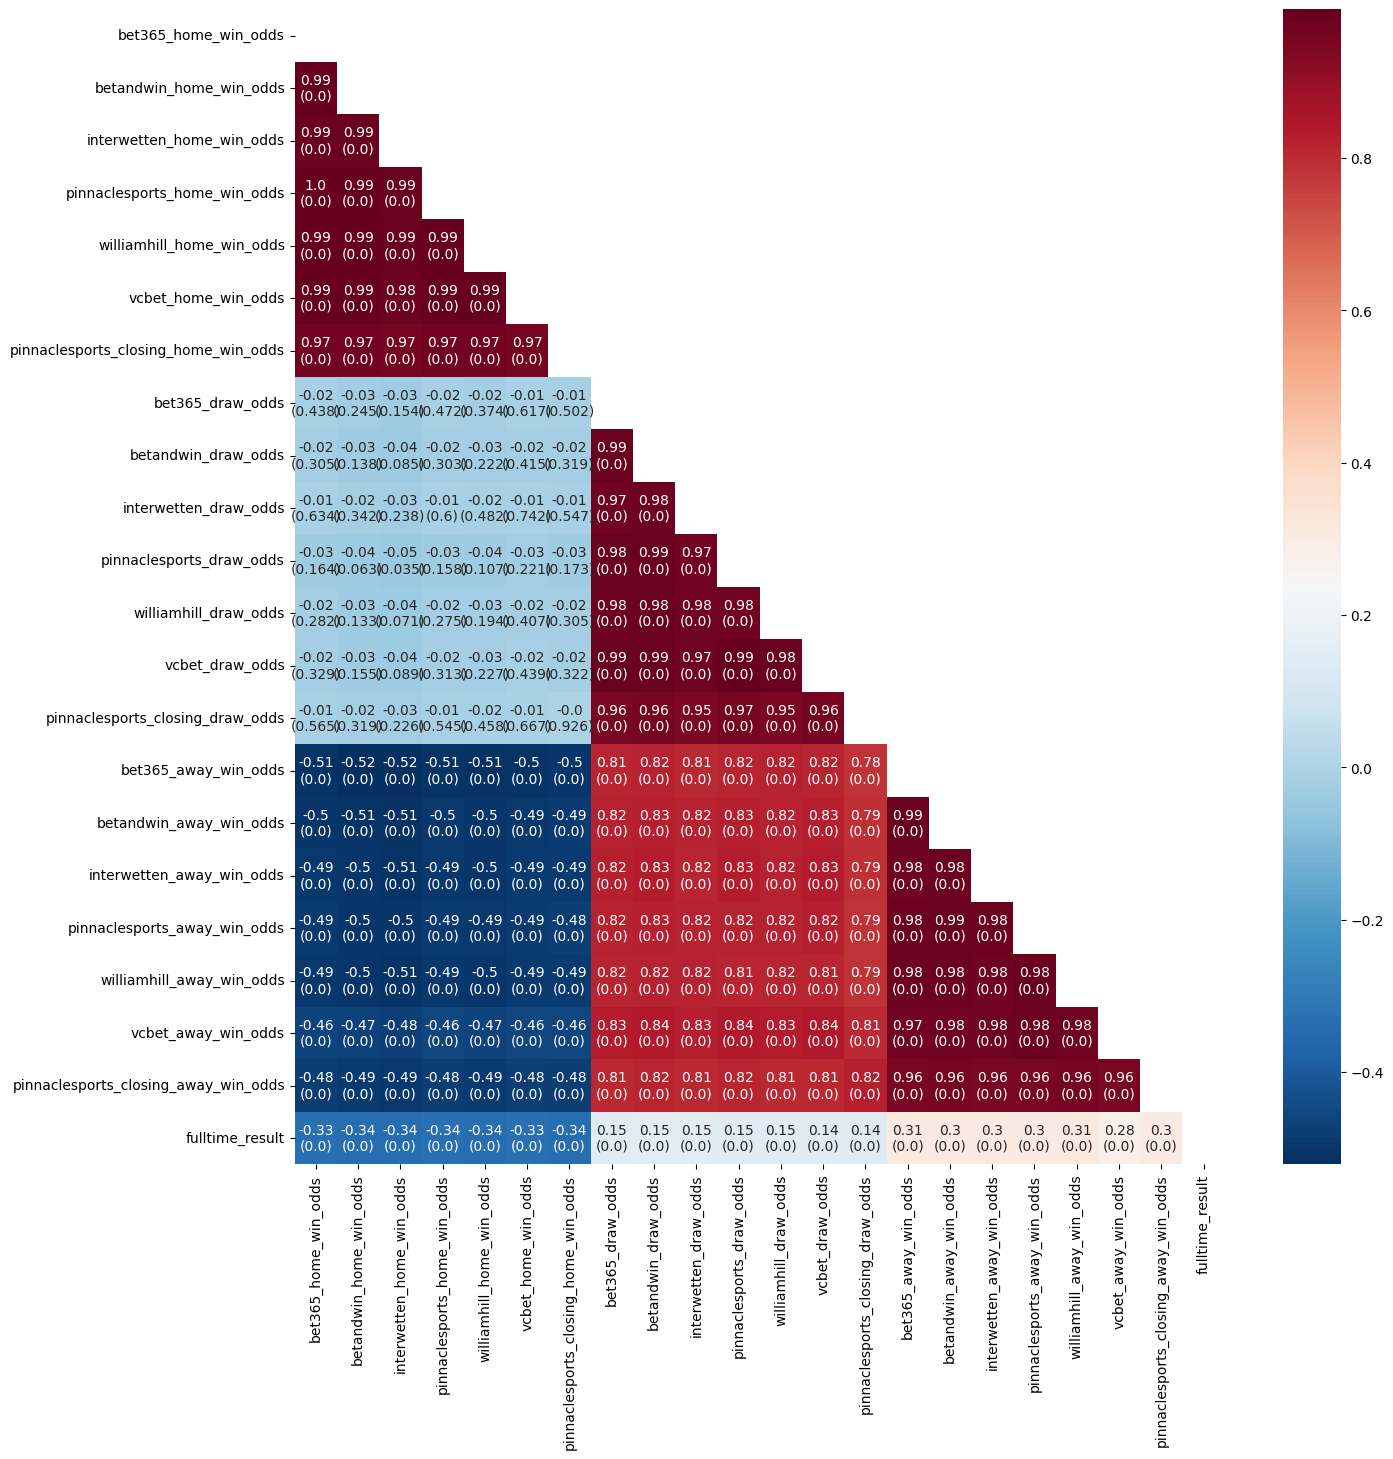

In [14]:
from scipy.stats import pearsonr

# Moving the team_1_result feature to the last
plot_df = df[
    betting_cols + ['fulltime_result']]

# Preparing the correlation matrix
corr = plot_df.corr(numeric_only=True)
# Calculating the p-values
pval = (plot_df.corr(
    numeric_only=True,
    method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr.shape))
# Preparing a table of correlations and p-values together
corr_pval = corr.round(2).astype(str) + '\n(' + pval.round(3).astype(str) + ')'

# Plotting the correlation matrix and annotating it with the generated table
plt.figure(figsize=(15,15))
hm = sns.heatmap(data=corr, 
                 annot=corr_pval,
                 fmt = '', 
                 cmap='RdBu_r',
                 mask=np.triu(corr))

As can be seen, each group of betting odds (Home_win, draw, and away_win) of every source closely correlates with the same group of every other source; so, taking only one of the sources makes sense as well as simplifies the model.<br>
The data gathered from bet365 will be kept and the rest will be dropped.

Now the final cleanup of the betting odds feature is in order; this step is to convert the odds to probabilities and uses the formula below:<br>
<ul>
<li>P(home_win) = home_win_odds / (home_win_odds + draw_odds + away_win_odds)</li>
<li>P(draw) = draw_odds / (home_win_odds + draw_odds + away_win_odds)</li>
<li>P(away_win) = away_win_odds / (home_win_odds + draw_odds + away_win_odds)</li>
</ul>
This step helps to make the betting odds consistent; hence allowing to use any betting service of choice during future predictions.

In [15]:
def get_bet_probs(row):
    home_win_odds, draw_odds, away_win_odds = row[['bet365_home_win_odds', 'bet365_draw_odds', 'bet365_away_win_odds']]
    total_odds = sum([home_win_odds, draw_odds, away_win_odds])
    return [round(val/total_odds, 2) for val in [home_win_odds, draw_odds, away_win_odds]]

df[['bet365_home_win_prob', 'bet365_draw_prob', 'bet365_away_win_prob']] = df.apply(
    lambda row: get_bet_probs(row),
    axis='columns',
    result_type='expand'
)

Now all the betting odds features may be dropped,

In [16]:
df = df.drop(betting_cols, axis='columns')

## Ratings

In [17]:
rating_cols = [col for col in df.columns if 'rating' in col]

rating_cols

['home_pre_rating',
 'home_rating_delta',
 'home_post_rating',
 'away_pre_rating',
 'away_rating_delta',
 'away_post_rating']

currently there are three rating features for each of the home and away teams:
<ul>
<li>pre_rating</li>
<li>rating_delta</li>
<li>post_rating</li>
</ul>
Since all the other data (including the cards, total shots, offsides, ...) are calculated after the match, to adhere to the consistency of data, the post_rating feature will be kept and the rest will be dropped.

In [18]:
df = df.drop(
    [col for col in rating_cols if 'post' not in col],
    axis='columns'
)

## String features

String features include the name of the two participating teams in a match as well as the name of the venue where the match was taking place.<br>
In order to use these in the prediction process, they need to be converted into categorical variables and encoded using ordinal or one-hot encoding; however, since the current sets of values are not closed (new categories might be added in the future) the training can never contain every possible value; hence, these features cannot be used in the model and should be dropped.

The 'home' and 'away' features will be used for the panel data analysis and will be dropped after that; but the venue is unnecessary and can be dropped here.

In [19]:
df = df.drop('venue', axis='columns')

# Duplicate instances

In [20]:
df[df.duplicated()]

,season,date,home,away,fulltime_home_goals,fulltime_away_goals,fulltime_result,halftime_home_goals,halftime_away_goals,halftime_result,...,away_fouls_won,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_xg,away_xg,bet365_home_win_prob,bet365_draw_prob,bet365_away_win_prob


There are no fully duplicated instances in the dataframe.

In [21]:
not_dup_cols = ['season', 'date', 'home', 'away', 'fulltime_home_goals', 'fulltime_away_goals', 'fulltime_result', 'halftime_result', 'venue']

df[df.duplicated(subset=[col for col in df.columns if col not in not_dup_cols])]

,season,date,home,away,fulltime_home_goals,fulltime_away_goals,fulltime_result,halftime_home_goals,halftime_away_goals,halftime_result,...,away_fouls_won,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_xg,away_xg,bet365_home_win_prob,bet365_draw_prob,bet365_away_win_prob


There are also no duplicate instances where any two teams with the same attributes go against each other, regardless of the game result and number of scored goals.

# Outlier identification

In [22]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.describe()) 

,fulltime_home_goals,fulltime_away_goals,fulltime_result,halftime_home_goals,halftime_away_goals,halftime_result,home_post_rating,away_post_rating,home_possession,away_possession,home_total_shots,away_total_shots,home_shots_on_target,away_shots_on_target,home_shots_off_target,away_shots_off_target,home_blocked,away_blocked,home_passing_percent,away_passing_percent,home_clear_cut_chances,away_clear_cut_chances,home_corners,away_corners,home_offsides,away_offsides,home_tackles_percent,away_tackles_percent,home_aerial_duels,away_aerial_duels,home_saves,away_saves,home_fouls_committed,away_fouls_committed,home_fouls_won,away_fouls_won,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_xg,away_xg,bet365_home_win_prob,bet365_draw_prob,bet365_away_win_prob
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.00000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000
mean,1.436733,1.102927,1.159112,0.619924,0.483947,1.088763,1985.733239,1987.092540,50.822946,48.279981,12.986780,10.339471,4.495751,3.567517,5.474032,4.288952,3.016997,2.483003,78.087819,76.567989,1.580264,1.249764,5.224740,4.177054,2.28848,2.101039,60.831917,60.796506,50.075071,49.097262,2.464117,3.070349,13.577432,13.427762,12.631256,12.838527,2.324835,2.474976,0.118508,0.116619,1.447120,1.103824,0.259802,0.355935,0.384363
std,1.228888,1.094833,0.839332,0.800637,0.707926,0.737456,130.665739,130.851923,11.534111,11.531784,4.835491,4.192404,2.433961,2.107620,2.704295,2.371811,2.087752,1.894587,7.962645,8.571953,1.418525,1.250201,2.767568,2.468182,1.75235,1.769737,13.875997,13.888810,10.682321,10.687336,1.696195,1.991303,4.107944,4.140908,4.043517,3.995911,1.467409,1.477939,0.349947,0.336838,0.800224,0.701116,0.132389,0.028777,0.143147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1753.000000,1755.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,14.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.020000,0.230000,0.050000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1891.000000,1890.250000,43.000000,40.000000,10.000000,7.000000,3.000000,2.000000,4.000000,3.000000,1.000000,1.000000,73.000000,72.000000,1.000000,0.000000,3.000000,2.000000,1.00000,1.000000,52.000000,52.000000,43.000000,42.000000,1.000000,2.000000,11.000000,11.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.900000,0.600000,0.160000,0.340000,0.280000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1956.000000,1958.000000,51.000000,48.000000,13.000000,10.000000,4.000000,3.000000,5.000000,4.000000,3.000000,2.000000,79.000000,78.000000,1.000000,1.000000,5.000000,4.000000,2.00000,2.000000,61.000000,61.000000,50.000000,50.000000,2.000000,3.000000,13.000000,13.000000,12.000000,12.500000,2.000000,2.000000,0.000000,0.000000,1.300000,0.900000,0.250000,0.360000,0.390000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2049.000000,2053.750000,59.000000,56.000000,16.000000,13.000000,6.000000,5.000000,7.000000,6.000000,4.000000,4.000000,84.000000,83.000000,2.000000,2.000000,7.000000,6.000000,3.00000,3.000000,70.000000,70.000000,57.000000,56.000000,3.000000,4.000000,16.000000,16.000000,15.000000,15.000000,3.000000,3.000000,0.000000,0.000000,1.900000,1.500000,0.340000,0.380000,0.490000
max,8.000000,6.000000,2.000000,5.000000,5.000000,2.000000,2406.000000,2415.000000,82.000000,82.000000,36.000000,29.000000,17.

The code below uses z-score with the threshold of 3 to detect outliers. 

In [23]:
outlier_cols = df.select_dtypes(include=['int', 'float']).columns

outlier_indices = set()
for col in outlier_cols:
    col_mean = round(df[col].mean(), 2)
    col_std = round(df[col].std(), 2)
    threshold = 3
    col_filtered = df[((df[col] - col_mean) / col_std) > 3]
    
    total_outliers = col_filtered.shape[0]
    
    if total_outliers > 0:
        print(f"{col}\n{'-'*30}\nTotal number of outliers: {total_outliers}")
        print(f"Mean={col_mean}, Std={col_std}")
        print(f"Outlier values: {col_filtered[col].unique()}\n")
        outlier_indices = outlier_indices.union(set(col_filtered.index))

df = df.drop(outlier_indices, axis='index')
print(f"Overall, {len(outlier_indices)} instances containing outliers were dropped.")

fulltime_home_goals
------------------------------
Total number of outliers: 12
Mean=1.44, Std=1.23
Outlier values: [6 7 8]

fulltime_away_goals
------------------------------
Total number of outliers: 18
Mean=1.1, Std=1.09
Outlier values: [5 6]

halftime_home_goals
------------------------------
Total number of outliers: 11
Mean=0.62, Std=0.8
Outlier values: [5 4]

halftime_away_goals
------------------------------
Total number of outliers: 30
Mean=0.48, Std=0.71
Outlier values: [3 4 5]

home_post_rating
------------------------------
Total number of outliers: 5
Mean=1985.73, Std=130.67
Outlier values: [2406 2396 2383 2401 2393]

away_post_rating
------------------------------
Total number of outliers: 4
Mean=1987.09, Std=130.85
Outlier values: [2415 2403 2385]

home_total_shots
------------------------------
Total number of outliers: 15
Mean=12.99, Std=4.84
Outlier values: [28 30 29 33 32 36]

away_total_shots
------------------------------
Total number of outliers: 13
Mean=10.34, St